In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import gamma
from scipy.special import jv

import specrepro as sr

In [4]:
L = 1
#f = lambda x: np.sin(x**2) # is analytic and periodic on the interval [-L, L]
f = lambda x: x # analytic but not periodic

n_fcoeffs = 8
_, fcoeffs = sr.fourier_partial_sum_projection(f, L, n_fcoeffs)

In [5]:
# kappa = 0.4*(np.pi*np.e/27)
# lambdah = int(kappa*n_fcoeffs)
# m = lambdah

lambdah = 2*int(n_fcoeffs/4.0)
m = lambdah

gcoeffs = sr.compute_gegenbauer_coeffs_from_fourier(fcoeffs, m, lambdah)
gfunc = sr.gegenbauer_partial_sum(gcoeffs, lambdah)

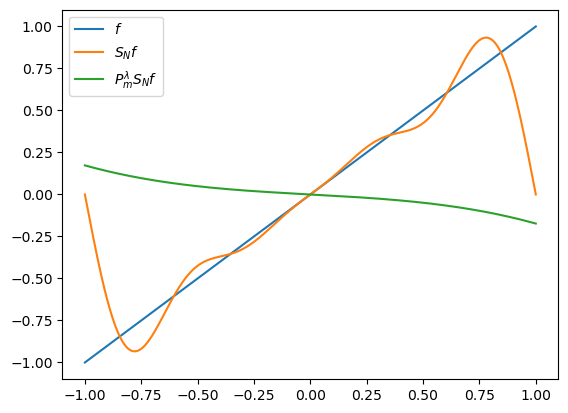

In [6]:
dom = np.linspace(-1,1,1000)

plt.plot(dom, f(dom), label="$f$")
fapprox, _ = sr.fourier_partial_sum_projection(f, L, n_fcoeffs)
plt.plot(dom, fapprox(dom), label="$S_N f$")
plt.plot(dom, gfunc(dom), label="$P_m^{\\lambda} S_N f$")
plt.legend()
plt.show()

# Direct Gegenbauer

In [7]:
from scipy.integrate import quad

In [8]:


def gegenbauer_coefficients(f, m, lambdah, **kwargs):
    """Given input f(x) defined on [-1, 1], returns the first m+1 coefficients 
        l = 0, \ldots, m
    of the function f on the interval [-1,1].
    """

    c_k = []
    weight_func = lambda x: np.power((1 - x**2), lambdah - 0.5 )

    for k in range(m+1):

        numerator = quad(lambda x: weight_func(x)*f(x)*sr.gegenbauer_polynomial(k, lambdah, x) , -1, 1, **kwargs)[0]
        denominator = quad(lambda x: weight_func(x)*(sr.gegenbauer_polynomial(k, lambdah, x)**2) , -1, 1, **kwargs)[0]
        c_k_val = numerator/denominator
        c_k.append(c_k_val)

    return c_k


In [37]:
f = lambda x: np.sin(x**3)
lambdah = 1.0
m = 5
gcoeffs = gegenbauer_coefficients(f, m, lambdah,)

In [38]:
gfunc = sr.gegenbauer_partial_sum(gcoeffs, lambdah)

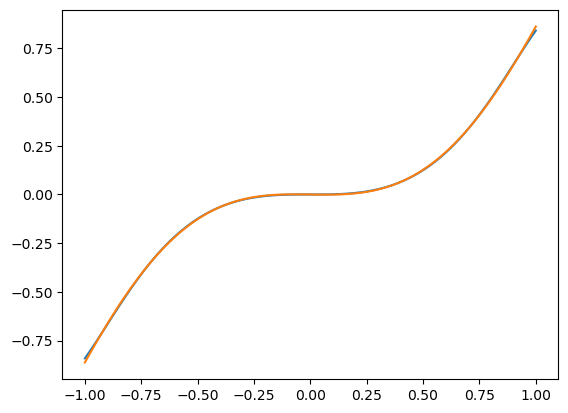

In [39]:
dom = np.linspace(-1,1,100)
rang = gfunc(dom)
plt.plot(dom, f(dom))
plt.plot(dom, rang)
plt.show()

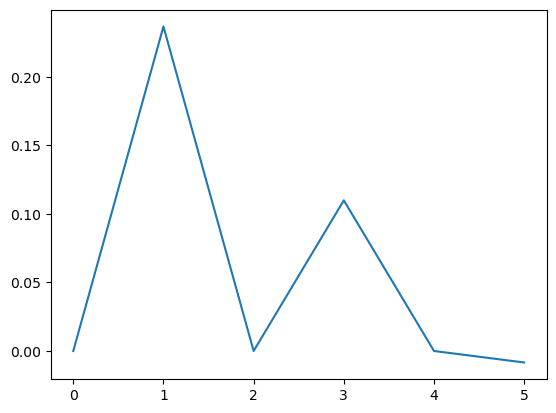

In [40]:
plt.plot(gcoeffs)

# Use numerical calculation of gegenbauer coefficients

In [58]:
L = 1
#f = lambda x: np.sin(x**2) # is analytic and periodic on the interval [-L, L]
f = lambda x: x # analytic but not periodic

N = 8
fapprox, fcoeffs = sr.fourier_partial_sum_projection(f, L, N)

m = 2
lambdah = 2

In [59]:
gcoeffs = gegenbauer_coefficients(fapprox, m, lambdah)
gfunc = sr.gegenbauer_partial_sum(gcoeffs, lambdah)

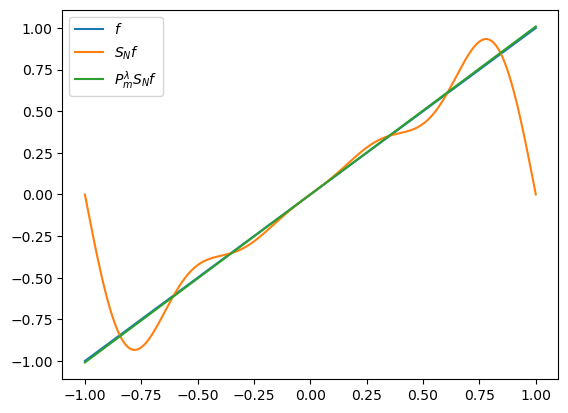

In [60]:
dom = np.linspace(-1,1,1000)

plt.plot(dom, f(dom), label="$f$")
fapprox, _ = sr.fourier_partial_sum_projection(f, L, n_fcoeffs)
plt.plot(dom, fapprox(dom), label="$S_N f$")
plt.plot(dom, gfunc(dom), label="$P_m^{\\lambda} S_N f$")
plt.legend()
plt.show()

In [ ]:
dom = np.linspace(-1,1,1000)

plt.plot(dom, f(dom), label="$f$")
fapprox, _ = sr.fourier_partial_sum_projection(f, L, n_fcoeffs)
plt.plot(dom, fapprox(dom), label="$S_N f$")
plt.plot(dom, gfunc(dom), label="$P_m^{\\lambda} S_N f$")
plt.legend()
plt.show()